# Pandas 코딩 꿀팁

## Pandas로 데이터 분석하기


<pre>
Pandas는 데이터 분석 시 이용하는 대표적인 Python 라이브러리이다.
실무를 진행하면서 많은 시행착오를 겪으면서 시간을 소비했던 내용들이 
아래의 링크, 동영상에 정리가 잘 된 것 같아 내용 중 실제로 도움이 많이 되었던 것을

복습을 할 겸 정리를 하고자 한다.
</pre>
(링크: https://www.youtube.com/watch?v=_gaAoJBMJ_Q&t=107s)

In [1]:
import numpy as np
import pandas as pd
def get_dataset(size):
    """Create Fake Dataset: Food, Color, Age, Date, Bool, Prob
    Args:
        size (int): Size of Fake Dataset

    Returns:
        df (pd.DataFrame): Fake Dataset
    """
    df = pd.DataFrame()
    df['Food'] = np.random.choice(['Chicken','Pizza','Bread', 'Cheese', 'Meat'], size)
    df['Color'] = np.random.choice(['Red','Blue','Yellow','Green', 'Black'], size)
    df['Age'] = np.random.randint(1, 99, size)
    dates = pd.date_range('2022-01-01', '2099-12-31')
    df['date'] = np.random.choice(dates, size)
    df['Bool'] = np.random.choice(['yes','no'], size)
    df['Prob'] = np.random.uniform(0, 1, size)
    return df
df = get_dataset(size=10000)
df.to_csv('./testData.csv')

#### Writing into csv with unnecessary index

> 요약: 데이터셋을 읽고 쓸 때, 불필요한 인덱스 처리를 하여 추후의 귀찮은 작업을 없애자.
1. df.to_csv('file_name.csv', index=False)
2. df = pd.read_csv('file_name.csv', index_col=[0])

In [2]:
# 아래와 같은 데이터 셋을 불러올 때
df.head(3)

,Food,Color,Age,date,Bool,Prob
0,Pizza,Blue,46,2077-09-18,no,0.880195
1,Bread,Green,97,2025-08-09,no,0.486516
2,Meat,Blue,53,2031-03-15,yes,0.374316


In [3]:
# 아래의 결과 처럼 처음에 지정하지 않은 데이터 Index가 생겨버린다.
# !type testData.csv

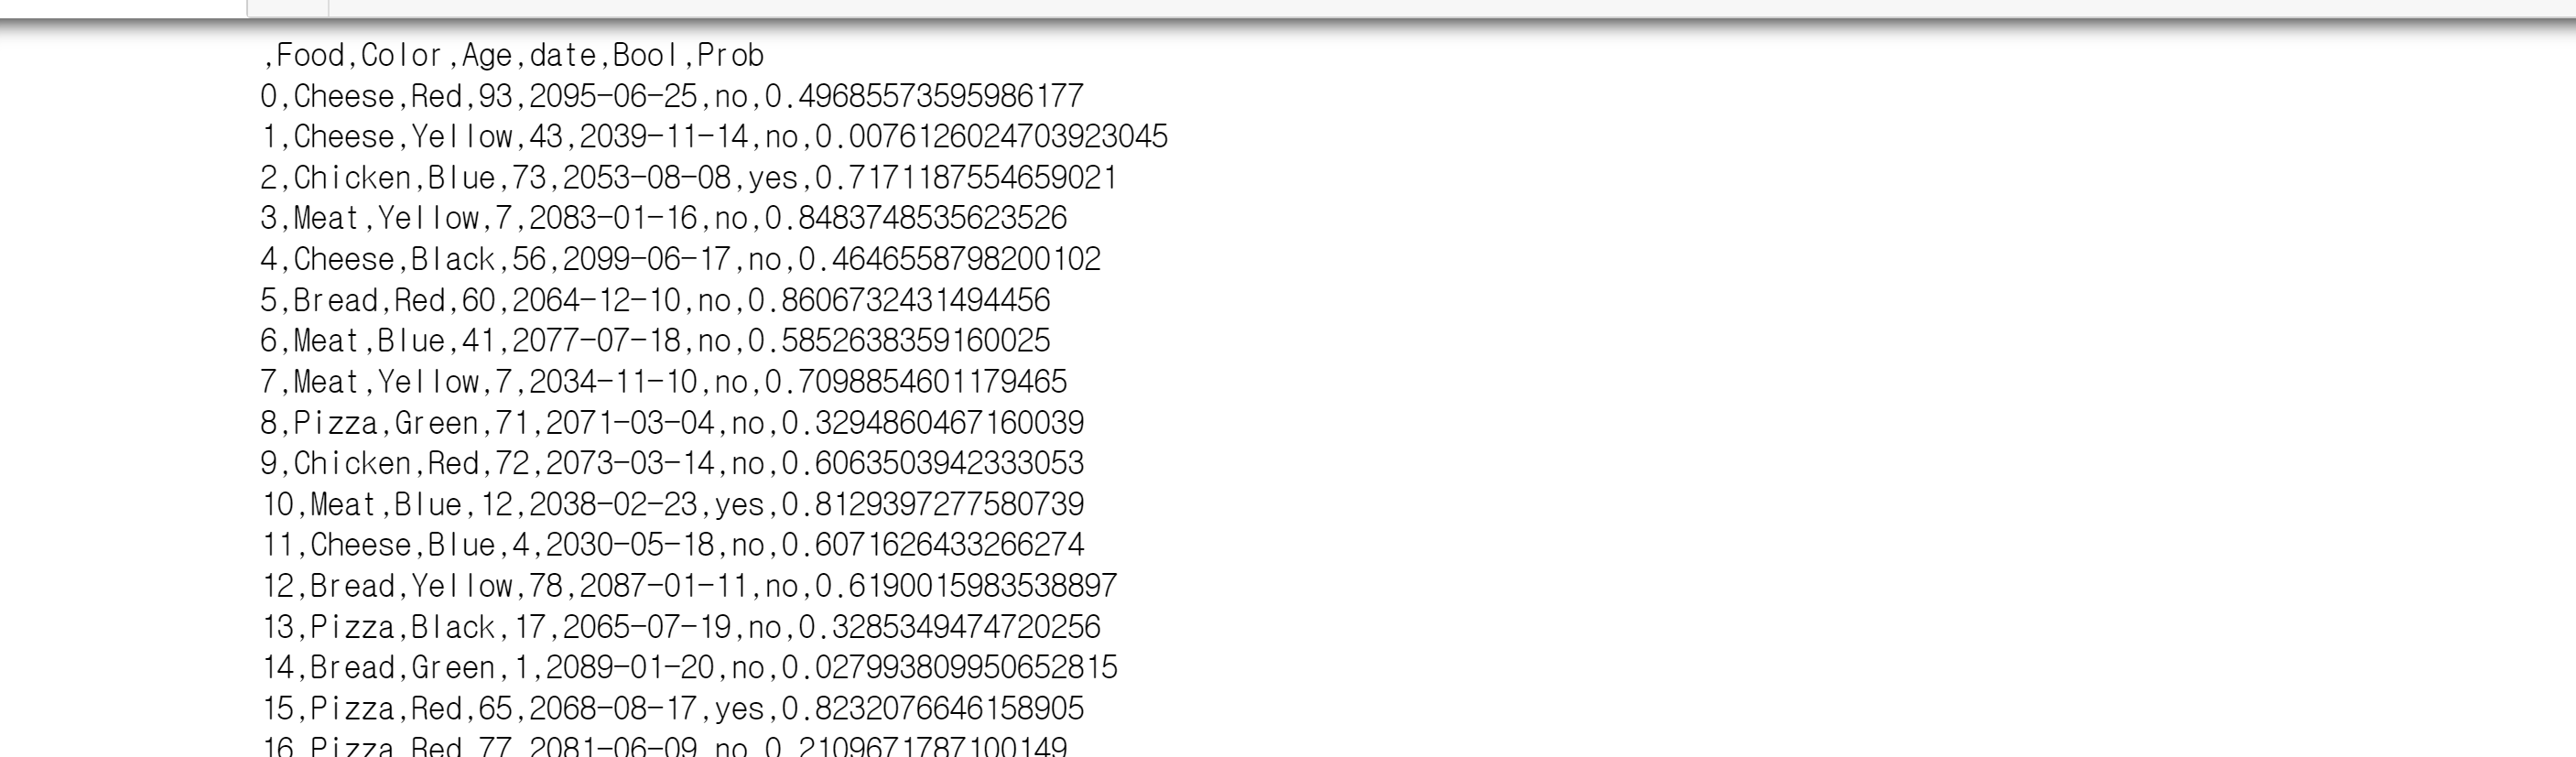

In [4]:
# 아래처럼 pd.read_csv로 읽어 들여오면 Unnamed: 0 라고 하는 칼럼이 등장하고, 이는 저장/반복을 반복할수록 늘어난다.
df = get_dataset(size=10000)
df.to_csv('./testData.csv')
df = pd.read_csv('./testData.csv')
df.head(3)

,Unnamed: 0,Food,Color,Age,date,Bool,Prob
0,0,Bread,Blue,74,2040-08-03,yes,0.960702
1,1,Bread,Blue,79,2055-07-25,no,0.171569
2,2,Cheese,Green,22,2086-04-05,no,0.547170


In [5]:
# 위와 같은 상황을 피하기 위해서 csv로 저장할 때 index=False를 넣어주자
df = get_dataset(size=10000)
df.to_csv('./testData.csv', index=False)
df = pd.read_csv('./testData.csv')
df.head(3)

,Food,Color,Age,date,Bool,Prob
0,Meat,Blue,20,2098-07-11,yes,0.885647
1,Cheese,Green,63,2047-09-05,no,0.931618
2,Cheese,Yellow,23,2025-01-09,yes,0.418922


In [6]:
# 혹은 아래처럼 csv를 읽어올 때, 첫 열을 index로 읽어올 수 있다.
df = get_dataset(size=10000)
df.to_csv('./testData.csv')
df = pd.read_csv('./testData.csv', index_col=[0])
df.head(3)

,Food,Color,Age,date,Bool,Prob
0,Pizza,Black,18,2047-09-01,yes,0.086405
1,Bread,Black,98,2037-12-22,no,0.052374
2,Pizza,Blue,81,2049-09-01,no,0.373470


#### Using column names which include spaces

> 요약: 데이터 프레임의 열 이름에 공란을 사용하는 것을 지양하자.

1. df.colum_name 과 같이 '.'을 이용하여 접근할 수 있다.

In [7]:
# 아래처럼 새로운 '음식의 첫글자'라는 열을 만든다고 할 때 공란 없이 제목을 만들면 
df = pd.read_csv('./testData.csv', index_col=[0])
df['First Letter in Food'] = df['Food'].str[:1]
df['First_Letter_in_Food'] = df['Food'].str[:1]
df.head(3)

,Food,Color,Age,date,Bool,Prob,First Letter in Food,First_Letter_in_Food
0,Pizza,Black,18,2047-09-01,yes,0.086405,P,P
1,Bread,Black,98,2037-12-22,no,0.052374,B,B
2,Pizza,Blue,81,2049-09-01,no,0.373470,P,P


In [8]:
# df.First_Letter_in_Food 과 같이 '.'을 이용하여 접근할 수 있다.
df.First_Letter_in_Food.head(3)

0    P
1    B
2    P
Name: First_Letter_in_Food, dtype: object

In [9]:
# 하지만 아래는 당연스럽게도 오류가 난다.
#  df.First Letter in Food.head(3)
"""
df.First Letter in Food.head(3)
             ^
SyntaxError: invalid syntax                         
"""

'\ndf.First Letter in Food.head(3)\n             ^\nSyntaxError: invalid syntax                         \n'

In [10]:
# dot . 을 이용할 수 있다면 df.query도 가능하다.
df.query('First_Letter_in_Food == "B"')

,Food,Color,Age,date,Bool,Prob,First Letter in Food,First_Letter_in_Food
1,Bread,Black,98,2037-12-22,no,0.052374,B,B
5,Bread,Black,31,2093-05-27,yes,0.914217,B,B
14,Bread,Red,29,2073-03-20,yes,0.577338,B,B
16,Bread,Black,3,2094-11-10,no,0.132479,B,B
19,Bread,Red,58,2055-03-07,no,0.881096,B,B
...,...,...,...,...,...,...,...,...
9978,Bread,Blue,55,2071-10-17,yes,0.993652,B,B
9984,Bread,Blue,96,2095-06-08,yes,0.104918,B,B
9988,Bread,Blue,16,2059-07-02,no,0.802704,B,B
9995,Bread,Red,45,2030-11-05,no,0.743405,B,B


##### Filter dataset like a PRO with QUERY method

> 요약: df.loc도 좋다! 그러나 df.query 를 이용하면 데이터 필터링을 더욱 직관적으로 사용할 수 있다.


In [11]:
# 아래와 같이 loc + 조건문을 이용하여 원하는 데이터만 필터링 할 수 있다.
df = pd.read_csv('./testData.csv', index_col=[0])
df.loc[(df['Food']=='Bread') & (df['Age'] > 10)]

,Food,Color,Age,date,Bool,Prob
1,Bread,Black,98,2037-12-22,no,0.052374
5,Bread,Black,31,2093-05-27,yes,0.914217
14,Bread,Red,29,2073-03-20,yes,0.577338
19,Bread,Red,58,2055-03-07,no,0.881096
25,Bread,Yellow,70,2078-03-19,no,0.869983
...,...,...,...,...,...,...
9978,Bread,Blue,55,2071-10-17,yes,0.993652
9984,Bread,Blue,96,2095-06-08,yes,0.104918
9988,Bread,Blue,16,2059-07-02,no,0.802704
9995,Bread,Red,45,2030-11-05,no,0.743405


In [12]:
# 아래와 같이 Query문을 이용하여 원하는 데이터만 필터링할 수 있다.
df = pd.read_csv('./testData.csv', index_col=[0])
df.query('Food=="Bread" and Age>10')

# 아래와 같이 복잡한 구문도 더 자유롭게 쓸 수 있게되었다.
df.query('(Food == "Bread" or Color=="Yellow") and Age>1 and (Prob>0.33 or Bool=="yes")')

# 나의 있어빌리티가 +1 되었다..

,Food,Color,Age,date,Bool,Prob
5,Bread,Black,31,2093-05-27,yes,0.914217
6,Meat,Yellow,58,2094-01-12,no,0.680809
13,Meat,Yellow,86,2056-11-05,yes,0.882984
14,Bread,Red,29,2073-03-20,yes,0.577338
17,Meat,Yellow,21,2060-04-15,no,0.505103
...,...,...,...,...,...,...
9988,Bread,Blue,16,2059-07-02,no,0.802704
9991,Cheese,Yellow,97,2070-06-21,yes,0.629906
9995,Bread,Red,45,2030-11-05,no,0.743405
9996,Bread,Black,23,2062-01-05,yes,0.821992


In [13]:
# 물론 아래처럼 쓸 수 도 있다. 하지만 위의 방법이 더 직관적이다.
df.loc[((df['Food']=='Bread') | (df['Color']=='Yellow')) & (df['Age']>1) & ((df['Prob']>0.33) | (df['Bool']=='yes'))]

,Food,Color,Age,date,Bool,Prob
5,Bread,Black,31,2093-05-27,yes,0.914217
6,Meat,Yellow,58,2094-01-12,no,0.680809
13,Meat,Yellow,86,2056-11-05,yes,0.882984
14,Bread,Red,29,2073-03-20,yes,0.577338
17,Meat,Yellow,21,2060-04-15,no,0.505103
...,...,...,...,...,...,...
9988,Bread,Blue,16,2059-07-02,no,0.802704
9991,Cheese,Yellow,97,2070-06-21,yes,0.629906
9995,Bread,Red,45,2030-11-05,no,0.743405
9996,Bread,Black,23,2062-01-05,yes,0.821992


#### query strings with(@ symbol) to easily reach variables

> 요약: df.query 문 내에 @변수를 작성하여 외부 변수를 쿼리문에 사용할 수 있다.

In [14]:
# df.query를 이용하면 데이터 필터링을 직관적으로 할 수 있으나, 쿼리문에 변수가 들어간다면..?
df = pd.read_csv('./testData.csv', index_col=[0])

my_food = "Bread"
my_color = "Yellow"
my_age = 1
my_prob = 0.33
my_bool = "yes"

# 수동으로 쓴다: 의미가 없다.
df.query('(Food == "Bread" or Color=="Yellow") and Age>1 and (Prob>0.33 or Bool=="yes")').head(3)

,Food,Color,Age,date,Bool,Prob
5,Bread,Black,31,2093-05-27,yes,0.914217
6,Meat,Yellow,58,2094-01-12,no,0.680809
13,Meat,Yellow,86,2056-11-05,yes,0.882984


In [15]:
# 아래와 같이 변수를 직접 넣는다: 매번 ", ' 덕분에 Syntax 오류를 경험했다.
df.query('(Food == "' + str(my_food) + '" or Color== "' + my_color + '") and Age > '+ str(my_age) +' and (Prob > '+ str(my_prob) +' or Bool=="'+ my_bool +'")').head(3)

,Food,Color,Age,date,Bool,Prob
5,Bread,Black,31,2093-05-27,yes,0.914217
6,Meat,Yellow,58,2094-01-12,no,0.680809
13,Meat,Yellow,86,2056-11-05,yes,0.882984


In [16]:
# 아래와 같이 f string을 이용한다: 그나마 쓸만해서 사용하고 있다.
df.query(f'(Food == "{my_food}" or Color== "{my_color}") and Age > {my_age} and (Prob > {my_prob} or Bool=="{my_bool}")').head(3)

,Food,Color,Age,date,Bool,Prob
5,Bread,Black,31,2093-05-27,yes,0.914217
6,Meat,Yellow,58,2094-01-12,no,0.680809
13,Meat,Yellow,86,2056-11-05,yes,0.882984


In [17]:
# 하지만 query 내에 외부 변수를 사용할 수 있는 syntax가 있었다...!
df.query('(Food == @my_food or Color== @my_color) and Age > @my_age and (Prob > @my_prob or Bool== @my_bool)').head(3)

# 나의 있어빌리티가 +1 되었다..

,Food,Color,Age,date,Bool,Prob
5,Bread,Black,31,2093-05-27,yes,0.914217
6,Meat,Yellow,58,2094-01-12,no,0.680809
13,Meat,Yellow,86,2056-11-05,yes,0.882984


####  Can use pandas plot method instead of matplotlib import

> 요약: 빠르게 차트를 그리고 싶다면, df.plot을 이용하여 그리는 것도 하나의 방법임.

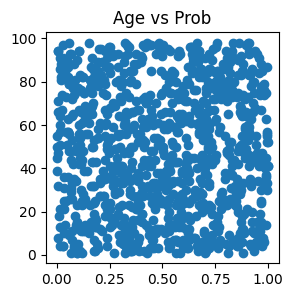

In [18]:
import matplotlib.pyplot as plt

df = pd.read_csv('./testData.csv')[::10]

# Create Variables
age = df['Age']
prob = df['Prob']

# Create Plot
fig, ax = plt.subplots(figsize=(3, 3))
plt.scatter(x=prob, y=age)
ax.set_title("Age vs Prob")
plt.show();

<AxesSubplot:xlabel='Prob', ylabel='Age'>

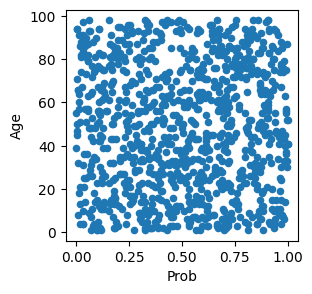

In [19]:
df.plot(kind='scatter', x='Prob', y='Age', figsize=(3, 3))

#### conditional format in pandas(like in Microsoft Excel)

> 요약: Pandas.style 을 이용하면 아래와 같은 서식을 꾸밀 수 있다.
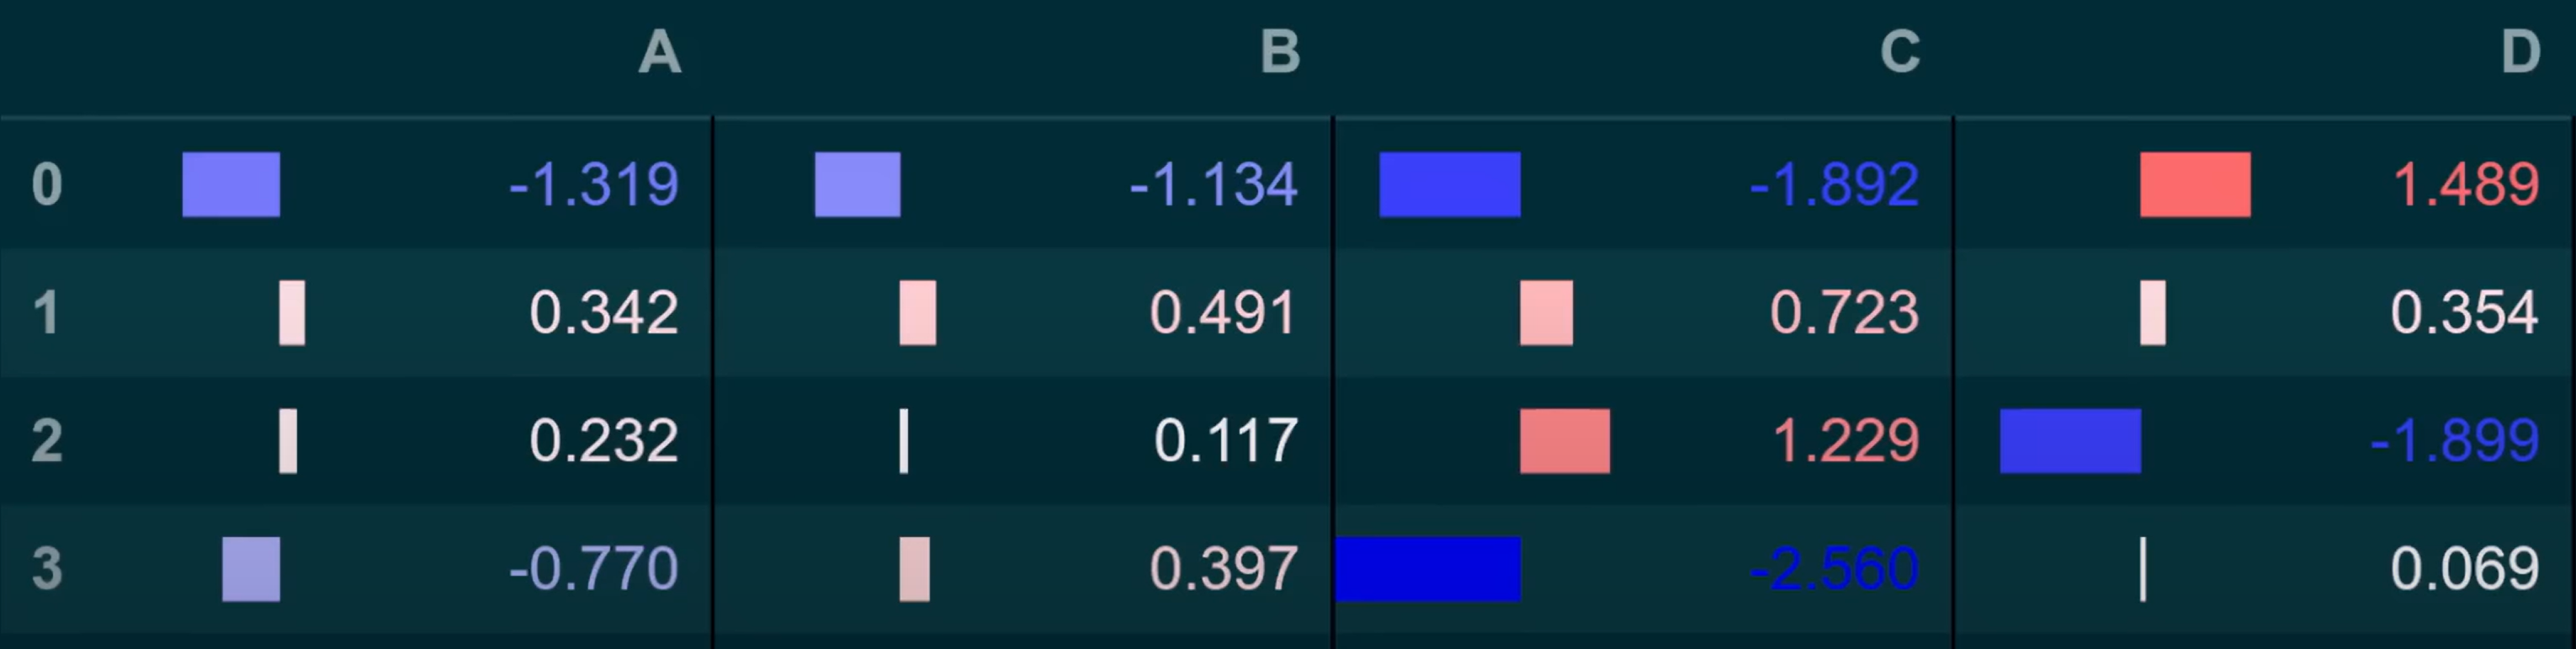


In [20]:
# Excel에서 Pandas를 이용했다가 다시 Excel로 돌아가는 이유 중에 조건에 따른 서식을 적용하지 못한 것도 있다.
# 아래처럼 서식을 이용해보자.
# 새로운 주로 버전 1.2.x 를 사용했는데 1.4~이후 부터는 더 보기 좋은 서식이 등장했다고 한다.


df = pd.read_csv('./testData.csv')[::10]
df[['Prob']].head(10).style.background_gradient(cmap='Reds')

,Prob
0,0.086405
10,0.219389
20,0.967945
30,0.819716
40,0.884297
50,0.410427
60,0.664897
70,0.330647
80,0.544237
90,0.022066


In [21]:
df[['Age']].head(10).style.bar(align='mid', vmin=1, vmax=99)

,Age
0,18
10,75
20,24
30,92
40,47
50,53
60,40
70,38
80,33
90,81


#### Use suffixes while merging TWO dataframes

> 요약: suffixes를 이용하여 두 데이터 프레임간 병합에서 칼럼 명을 바꿀 수 있다.

In [22]:
df = pd.read_csv('./testData.csv', index_col=[0])[::10]
df1 = pd.read_csv('./testData.csv', index_col=[0])[::10]

# Concat은 두 데이터프레임을 말 그대로 옆이나 아래로 "이어 붙인다."
# merge는 두 데이터프레임을 각 데이터에 존재하는 고유값(key)을 기준으로 병합할때 사용

# axis=1 방향으로 병합을 하게 되면 아래와 같이 _x, _y로 칼럼의 이름이 붙는다.
df_merge = df.merge(df1, on=['date'])
df_merge.head(3)

,Food_x,Color_x,Age_x,date,Bool_x,Prob_x,Food_y,Color_y,Age_y,Bool_y,Prob_y
0,Pizza,Black,18,2047-09-01,yes,0.086405,Pizza,Black,18,yes,0.086405
1,Chicken,Red,75,2053-05-07,no,0.219389,Chicken,Red,75,no,0.219389
2,Cheese,Green,24,2089-05-03,yes,0.967945,Cheese,Green,24,yes,0.967945


In [23]:
# axis=1 방향으로 병합을 하게 되면 suffixes를 이용하면 특정 단어로 Customize 할 수 도 있다.
df_merge2 = df.merge(df1, on=['date'], suffixes=('_First', '_Second'))
df_merge2.head(3)

,Food_First,Color_First,Age_First,date,Bool_First,Prob_First,Food_Second,Color_Second,Age_Second,Bool_Second,Prob_Second
0,Pizza,Black,18,2047-09-01,yes,0.086405,Pizza,Black,18,yes,0.086405
1,Chicken,Red,75,2053-05-07,no,0.219389,Chicken,Red,75,no,0.219389
2,Cheese,Green,24,2089-05-03,yes,0.967945,Cheese,Green,24,yes,0.967945


#### categorical datatypes use less space

> 요약: Object 보다는 Categorical 타입을 사용하면 메모리를 덜 잡아먹는다.

In [24]:
df = pd.read_csv('./testData.csv', index_col=[0])[::10]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 9990
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    1000 non-null   object 
 1   Color   1000 non-null   object 
 2   Age     1000 non-null   int64  
 3   date    1000 non-null   object 
 4   Bool    1000 non-null   object 
 5   Prob    1000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 54.7+ KB


In [25]:
df['Food'] = df['Food'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 9990
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Food    1000 non-null   category
 1   Color   1000 non-null   object  
 2   Age     1000 non-null   int64   
 3   date    1000 non-null   object  
 4   Bool    1000 non-null   object  
 5   Prob    1000 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 48.0+ KB


In [26]:
df['Color'] = df['Color'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 9990
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Food    1000 non-null   category
 1   Color   1000 non-null   category
 2   Age     1000 non-null   int64   
 3   date    1000 non-null   object  
 4   Bool    1000 non-null   object  
 5   Prob    1000 non-null   float64 
dtypes: category(2), float64(1), int64(1), object(2)
memory usage: 41.4+ KB


In [27]:
# 번외로 당연히 Object보다는 Boolean이 더 적은 메모리를 사용한다.
df['Bool'] = df['Bool'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 9990
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Food    1000 non-null   category
 1   Color   1000 non-null   category
 2   Age     1000 non-null   int64   
 3   date    1000 non-null   object  
 4   Bool    1000 non-null   bool    
 5   Prob    1000 non-null   float64 
dtypes: bool(1), category(2), float64(1), int64(1), object(1)
memory usage: 34.6+ KB
